# 2. Machine learning for Regression

In [72]:
import pandas as pd
import numpy as np

## 2.2 Data preparation

In [73]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'


In [74]:
#!wget $data

In [75]:
df = pd.read_csv('data.csv')

In [76]:
df.head()
# MSRP (manufacturer's suggested retail price)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [77]:
# dont forget to use str before string method
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [78]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [79]:
df.dtypes


make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [80]:
df.dtypes == 'object'

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [81]:
df.dtypes[df.dtypes == 'object']
# left column of out is index and right column in output are values

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [82]:
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [83]:
df.dtypes[df.dtypes == 'object'].values

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O')], dtype=object)

In [84]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [85]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [86]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## Exploratory data analysis

In [87]:
# popularity is how often is mentioned on twitter??
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) # which unique values are in a column
    print(df[col].nunique()) # number of unique values in a column 
    print()


make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

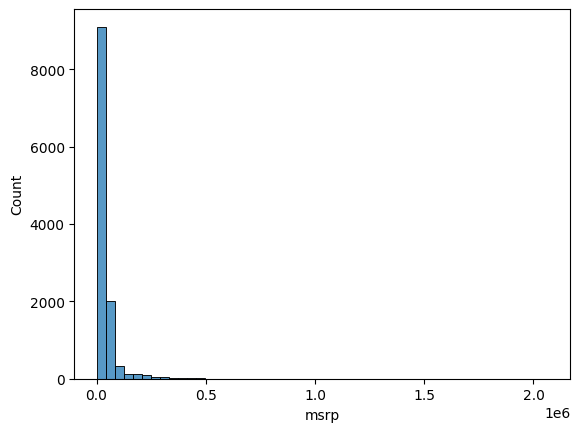

In [89]:
sns.histplot(df.msrp, bins=50)
# 1e6 = 1 million = 10^6 in scientifc notation
# the graph would be called a long tail destribution because it has a long tail on the right hand side

<Axes: xlabel='msrp', ylabel='Count'>

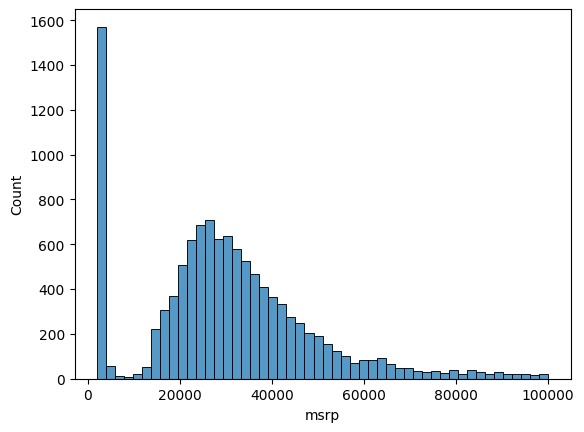

In [90]:
# without tail, zoom in on the left hand side
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
# peak in 1000 maybe because its the lowest price for the platform
# 25 k would be in the middle 
# its typical for prices to have a long tail distribution because cheapest for the most people and some more expansive options for rich people

In [91]:
# the long tail distribution is not a good thing for ML because the model will be biased towards the most common values and will not perform well on the rare values
# maybe with log we smooth things out
# there is no log of 0 so we add 1 to all values there is a function in nypy
np.log1p([0,1,10,100,1000])

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478])

In [92]:
np.log([0+1,1+1,10+1,100+1,1000+1])

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478])

In [93]:
price_log = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

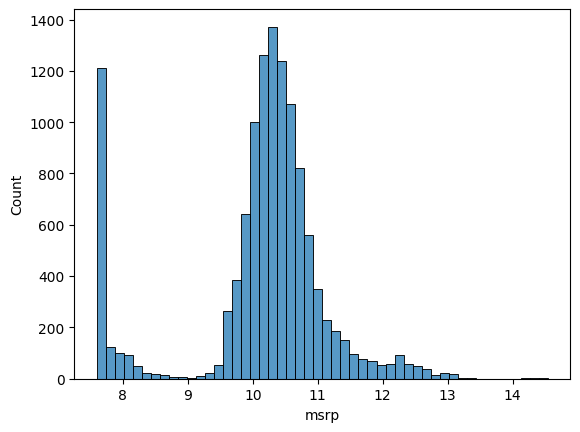

In [94]:
sns.histplot(price_log, bins=50)
# now it looks more like a normal distribution except for the left hand side
# we want to have normal distribution, and get rid of long tail, its good for out modeling

In [95]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting up the Validation Framework
- [X_t ytTrain 60 % |X_v y_v Validation 20 %| X_test y_test Test 20%]

In [96]:
#from ipycanvas import Canvas
#import ipywidgets as widgets
#from IPython.display import display
#from PIL import Image
#import numpy as np

# keep pixel data synced to Python so we can export
#canvas = Canvas(width=50, height=25, sync_image_data=True)

#drawing = {"active": False}

#def start_draw(x, y):
#    drawing["active"] = True
#    canvas.fill_circle(x, y, 2)

#def stop_draw(x, y):
#    drawing["active"] = False

#def draw(x, y):
#    if drawing["active"]:
#        canvas.fill_circle(x, y, 1)

# canvas.on_mouse_down(start_draw)
# canvas.on_mouse_up(stop_draw)
# canvas.on_mouse_move(draw)

# out = widgets.Output()

# def clear_canvas(b):
#    canvas.clear()
#    with out:
#        out.clear_output()

#def save_canvas(b):
    # Option A: use image data -> PIL image (works reliably)
#    arr = canvas.get_image_data(0, 0, canvas.width, canvas.height)  # (H,W,4) RGBA uint8
#    img = Image.fromarray(arr, mode="RGBA")
#    img.save("drawing.png")
#    with out:
#        out.clear_output(wait=True)
#        display(img)
#        print("Saved to drawing.png | array shape:", np.array(img).shape)

    # Option B (optional): if your version supports it, you can also do:
    # canvas.to_file("drawing.png")

# clear_btn = widgets.Button(description="Clear")
# clear_btn.on_click(clear_canvas)

# save_btn = widgets.Button(description="Save / Show")
# save_btn.on_click(save_canvas)

# display(widgets.VBox([canvas, widgets.HBox([clear_btn, save_btn]), out]))


In [97]:
n = len(df)
n_val = int(len(df) * 0.2)
n_test = int(len(df) * 0.2)
# n_train = int(len(df) * 0.6) # wouldnt work cause of rounding
n_train = n - n_val - n_test

In [98]:
n, n_val, n_test, n_train

(11914, 2382, 2382, 7150)

In [99]:
df.iloc[:10] # from 0-9 not inclusive of 10
df.iloc[10:20] # from 10-19 not inclusive of 20
df.iloc[20:] # from 20 to the end

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
20,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
21,audi,100,1992,regular_unleaded,172.0,6.0,manual,all_wheel_drive,4.0,luxury,midsize,sedan,21,16,3105,2000
22,audi,100,1993,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
23,audi,100,1993,regular_unleaded,172.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,wagon,20,16,3105,2000
24,audi,100,1993,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [100]:
n, n_val, n_test, n_train

(11914, 2382, 2382, 7150)

In [101]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_val+n_train:]


In [102]:
# problem that we are not shuffling the data, so if there is some seasonality in the data, we will have a problem
# only sequential
idx = np.arange(n) # create an array of indices from 0 to n-1
np.random.seed(2) # set the seed for reproducibility
np.random.shuffle(idx) # shuffle the indices

In [103]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_val+n_train:]]

df_train.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [104]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [105]:
# now we see the indzies are not sequential anymore
# but it can be a little bit irritating to see the origanl indices 
# so we can reset the indices
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [106]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [107]:
# just to make sure that we dont accidentally use target msrp in training
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# 2.6 Linear regression
g(X) = y, X=feature matrix train, g model, y price
g(x_i) = y_i where x_i is a car and y_i its price
x_i = (x_i1,..., x_in)
g(x_i1,..., x_in) = y_i


In [108]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [109]:
xi = [453, 11 ,86]

In [110]:
xi = [453, 11 ,86]
w0 = 7.17 
w = [0.01,0.04,0.002]


Dot product $ w_0 + x^{T}w = w_0 + \sum_{n=1}^{n} x_{i} * w_{i}$

In [111]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res += xi[j] * w[j]
    return res

In [112]:
def linear_regression_old(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred += w[j] * xi[j]
    return pred

w_new = [w0] + w

def linear_regression( xi):
    xi_new = [1] + xi
    #return w0 + dot(xi, w)
    return np.dot(xi_new, w_new)
  

In [113]:
linear_regression(xi)

np.float64(12.312)

In [114]:
np.exp(12.312) - 1

np.float64(222347.2221101062)

In [115]:
np.expm1(12.312)

np.float64(222347.2221101062)

In [116]:
xi = [453, 11 ,86]
w0 = 7.17 
w = [0.01,0.04,0.002]

![linear regression](linear_regression.jpg)

In [117]:
x1 = [1,148,24,1385]
x2 = [1,132,25,2031]
x10 = [1,453,11,86]

X = [x1, x2, x10]
x = np.array(X)
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

In [118]:
def linear_regression_np(X):
    return X @ np.array(w_new)

In [119]:
linear_regression_np(x)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

In [120]:
X = [
[148, 24, 1385],
[132, 25, 2031],
[453, 11, 86],
[158, 24, 185],
[172, 25, 201],
[413, 11, 86],
[38, 54, 185],
[142, 25, 431],
[453, 31, 86]
]
X = np.array(X)
X
ones = np.ones(X.shape[0]) # create an array of ones with the same number of rows as X
X_ones = np.column_stack((ones, X)) # add a column of ones to X
X_ones

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

$W = (X^{T} X^{-1}) X^Ty$

![linear regression gram](lin_reg_grammatrix.jpg)

In [121]:

y = [100000,200000,150,250,100,200,150,250, 120]
XTX = X_ones.T @ X_ones # XTX is gram matrix
XTX_inv = np.linalg.inv(XTX) # inverse of gram matrix
w_full = XTX_inv @ X_ones.T @ y
w_0 = w_full[0]
w = w_full[1:]
w_0, w

(np.float64(-49746.01587694212),
 array([ 74.24650588, 419.87480537, 106.02588896]))

In [122]:
# should be identity matrix but machine precision is finite numbers are close to 0
XTX @ XTX_inv

array([[ 1.00000000e+00, -1.95495204e-18,  2.12097050e-17,
         6.12616579e-19],
       [-9.06380006e-14,  1.00000000e+00,  1.59536962e-14,
        -1.36940028e-16],
       [-1.90098479e-13,  7.34292862e-18,  1.00000000e+00,
         7.95231589e-18],
       [-3.38086980e-13, -7.69365108e-16,  7.14303088e-14,
         1.00000000e+00]])

In [123]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) # create an array of ones with the same number of rows as X
    X = np.column_stack((ones, X)) # add a column of ones to X

    XTX = X.T @ X # XTX is gram matrix
    XTX_inv = np.linalg.inv(XTX) # inverse of gram matrix
    w_full = XTX_inv @ X.T @ y
    
    return w_full[0], w_full[1:]


In [124]:
train_linear_regression(X, y)

(np.float64(-49746.01587694212),
 array([ 74.24650588, 419.87480537, 106.02588896]))

## 2.8 car price baseline model

In [125]:
df_train.dtypes
# take all column with numerical values

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [126]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].values

- train_linear_regression calculates $w_0 , W$
- $g(X) = w_0 + X W $

In [127]:
# sometimes its ok to fill missing values with 0
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train @ w

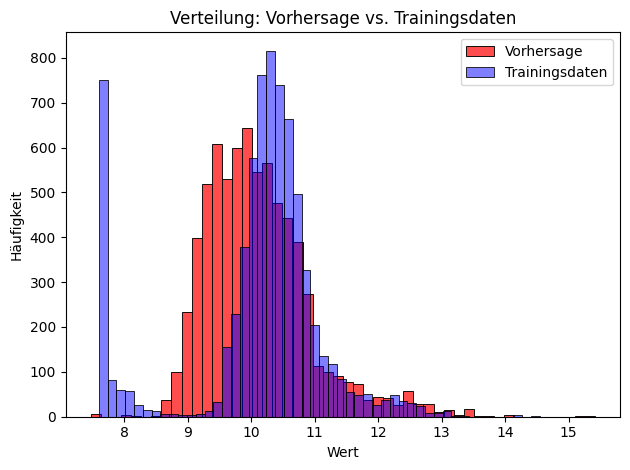

In [128]:
sns.histplot(y_pred,  color='red',  alpha=0.7, bins=50, label='Vorhersage')
sns.histplot(y_train, color='blue', alpha=0.5, bins=50, label='Trainingsdaten')

plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.title('Verteilung: Vorhersage vs. Trainingsdaten')
plt.legend(loc='upper right')   # Position bei Bedarf ändern
plt.tight_layout()
plt.show()

## 2.9 RMSE
$\sqrt{\frac{1}{m} \sum ( g(x_i) - y_i))^2}$

In [129]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [130]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

## 2.10 Validating the model